Домашнее задание №6. Гарилов В.Р. 142М

In [149]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.linalg import toeplitz
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
errors = {}

1. Моделирование измерения

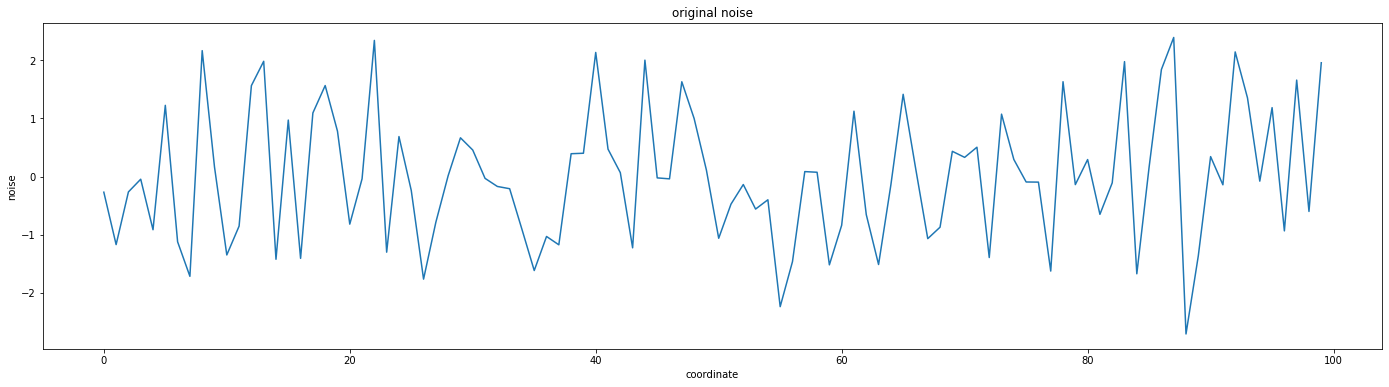

In [150]:
M = 100 #размерность сигнала
noise = np.random.normal(loc=0, scale=1, size=M)

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('noise')
plt.title('original noise')
plt.plot(np.arange(M), noise)


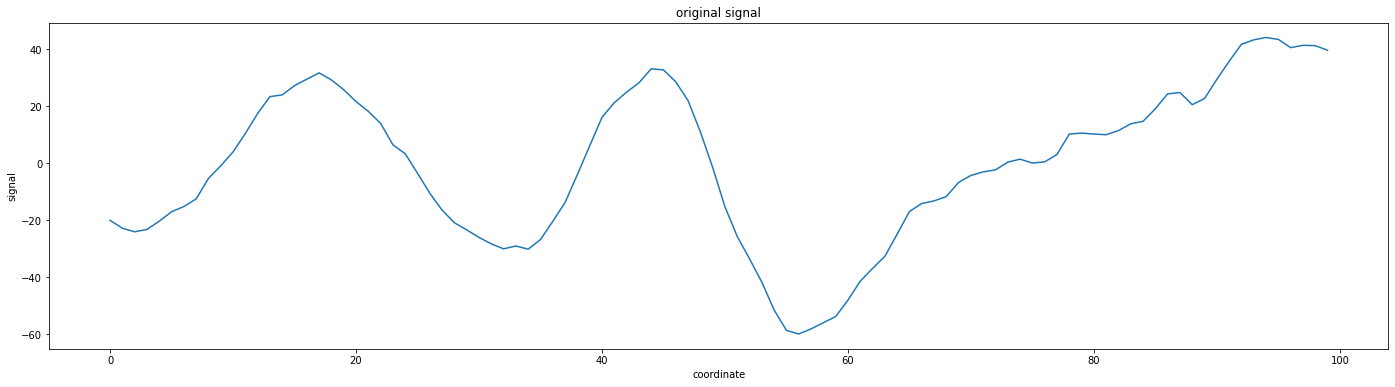

In [151]:
degree_of_smoothing = 10 #минимальное кол-во координат, учитываемых при сглаживании
basis = list(range(degree_of_smoothing, 0, -1)) + [0 for _ in range(M - degree_of_smoothing)]
B = toeplitz(basis) 

x = B @ noise
F = B @ np.transpose(B)

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.title('original signal')
plt.plot(np.arange(M), x)


In [152]:
k_0 = 10 #размер окна
N = M + 2 * k_0 #количество измерений 
filt = [1 / (2 * k_0 + 1) for _ in range(2 * k_0 + 1)] #прямоугольный фильтр
a = filt[k_0:] + [0 for _ in range(N - k_0 - 1)] 
A = toeplitz(a)[:, k_0:-k_0] #матрица A 

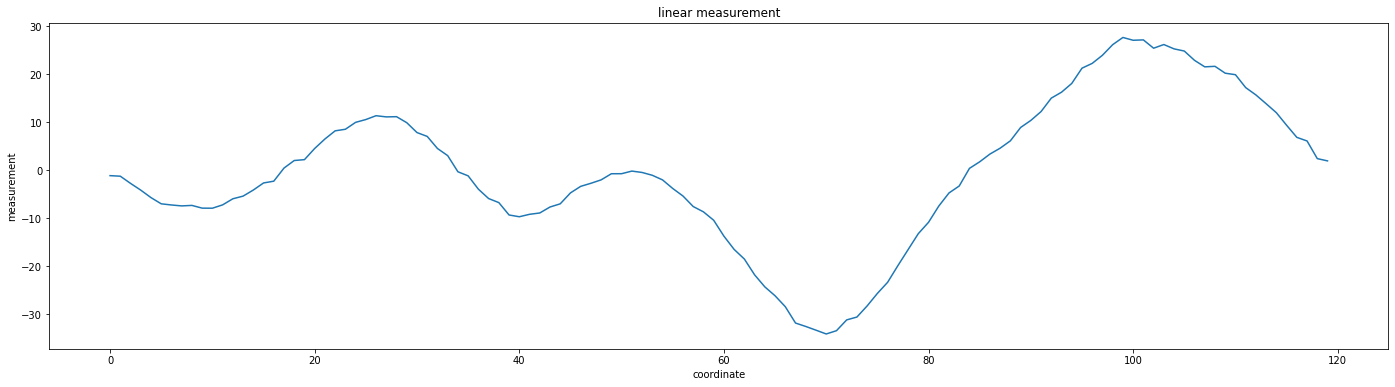

In [153]:
sigma = 0.5 #корень дисперсии шума
S = sigma ** 2 * np.eye(N) #оператор ковариации
bias = np.random.normal(loc=0, scale=sigma, size=N) #вектор шума

y = A @ x + bias

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('measurement')
plt.title('linear measurement')
plt.plot(np.arange(N), y)


2. Базовое оценивание

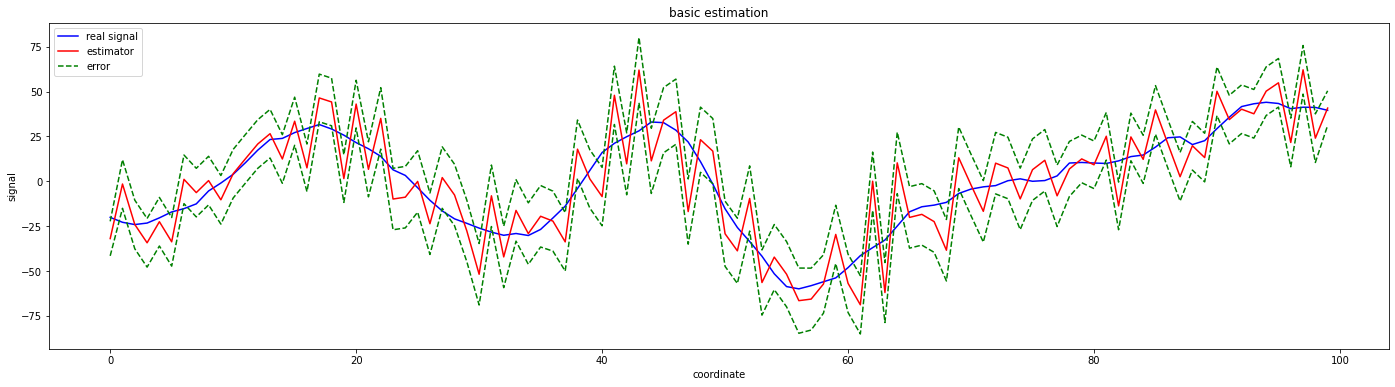

In [154]:
var = inv(np.transpose(A) @ inv(S) @ A) #оценка ковариационной матрицы
estimator = var @ np.transpose(A) @ inv(S) @ y #оценка x
D = np.array([np.sqrt(var[i, i]) for i in range(len(var))]) #вектор дисперсий x

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.plot(np.arange(M), x, color='blue', label='real signal')
plt.plot(np.arange(M), estimator, color='red', label='estimator')
plt.plot(np.arange(M), estimator - D, color='green', label='error', ls='--')
plt.plot(np.arange(M), estimator + D, color='green', ls='--')
plt.legend()
plt.title('basic estimation')
plt.show()

errors['basic estimation'] = mean_squared_error(x, estimator)

3. Оценивание с использованием априорной информации и нескольких экспериментов

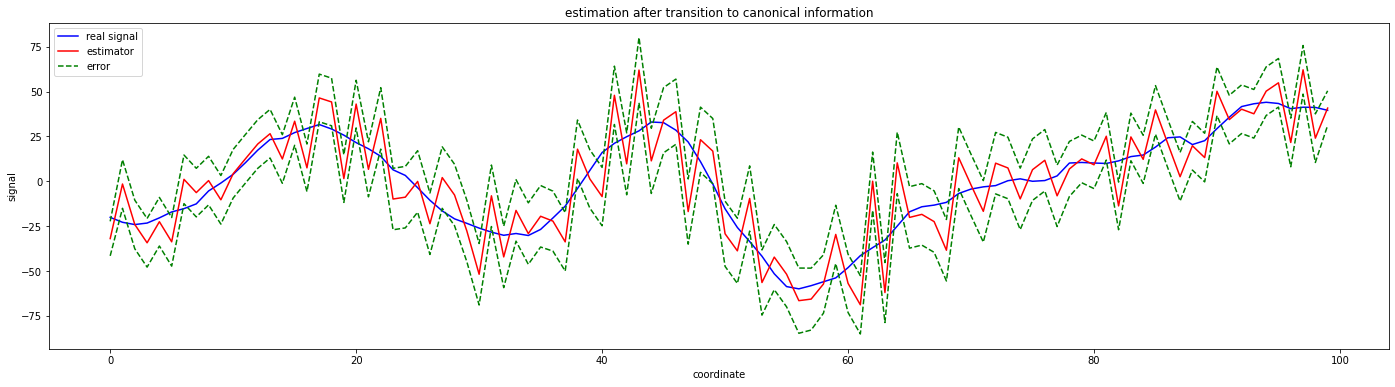

In [155]:
T = np.transpose(A) @ inv(S) @ A
v = np.transpose(A) @ inv(S) @ y

var = inv(T) #оценка ковариационной матрицы
estimator = inv(T) @ v #оценка x
D = np.array([np.sqrt(var[i, i]) for i in range(len(var))]) #вектор дисперсий x

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.plot(np.arange(M), x, color='blue', label='real signal')
plt.plot(np.arange(M), estimator, color='red', label='estimator')
plt.plot(np.arange(M), estimator - D, color='green', label='error', ls='--')
plt.plot(np.arange(M), estimator + D, color='green', ls='--')
plt.legend()
plt.title('estimation after transition to canonical information')
plt.show()

errors['estimation after transition to canonical information'] = mean_squared_error(x, estimator)

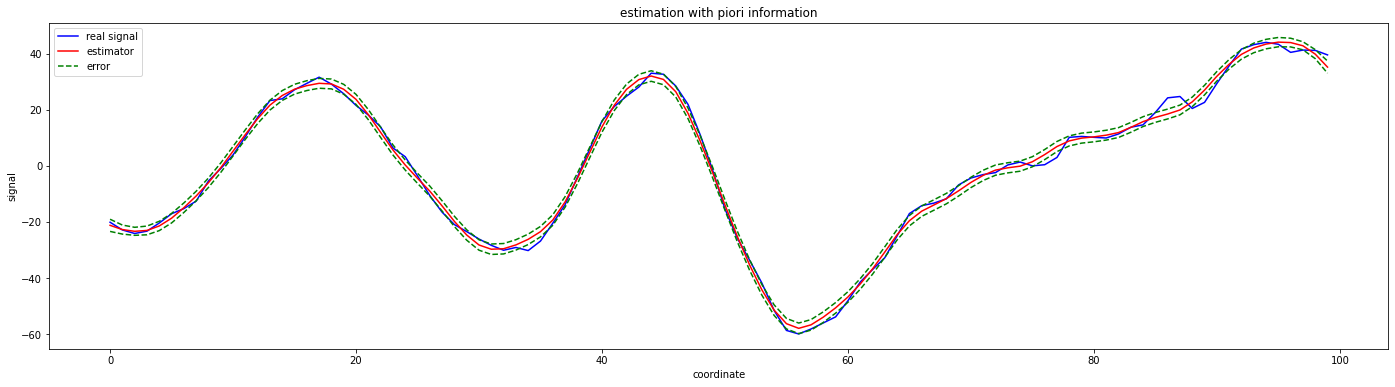

In [156]:
x_0 = np.zeros(M) #априорная информация о нулевом среднем 

T_0 = inv(F) #переход к канонической информации 
v_0 = T_0 @ x_0 #переход к канонической информации

T_ap = T + T_0 #сложение информации
v_ap = v + v_0 #сложение информации

var = inv(T_ap) #оценка ковариационной матрицы
estimator = inv(T_ap) @ v_ap #оценка x
D = np.array([np.sqrt(var[i, i]) for i in range(len(var))]) #вектор дисперсий x

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.plot(np.arange(M), x, color='blue', label='real signal')
plt.plot(np.arange(M), estimator, color='red', label='estimator')
plt.plot(np.arange(M), estimator - D, color='green', label='error', ls='--')
plt.plot(np.arange(M), estimator + D, color='green', ls='--')
plt.legend()
plt.title('estimation with piori information')
plt.show()

errors['estimation with piori information'] = mean_squared_error(x, estimator)

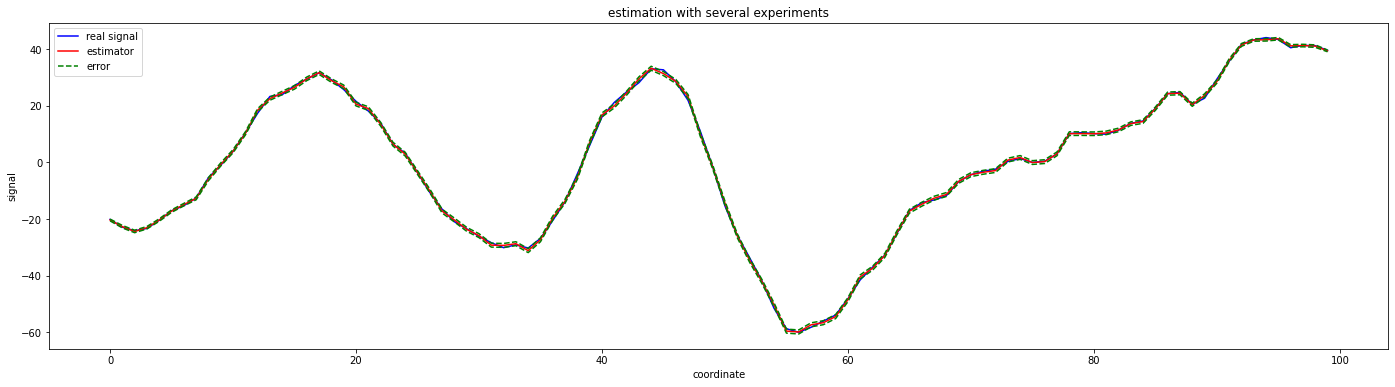

In [157]:
n_exp = 5
T, v = np.zeros((M, M)), np.zeros(M)
for _ in range(n_exp):
    k_0 = np.random.randint(1, 11) #случайный размер окна
    N = M + 2 * k_0 #количество измерений 
    filt = [1 / (2 * k_0 + 1) for _ in range(2 * k_0 + 1)] #прямоугольный фильтр
    a = filt[k_0:] + [0 for _ in range(N - k_0 - 1)] 
    A = toeplitz(a)[:, k_0:-k_0] #матрица A 

    sigma = np.random.rand() * 0.5 #случайный корень дисперсии шума
    S = sigma ** 2 * np.eye(N) #оператор ковариации
    bias = np.random.normal(loc=0, scale=sigma, size=N) #вектор шума

    y = A @ x + bias

    T += np.transpose(A) @ inv(S) @ A
    v += np.transpose(A) @ inv(S) @ y

var = inv(T) #оценка ковариационной матрицы
estimator = var @ v #оценка x
D = np.array([np.sqrt(var[i, i]) for i in range(len(var))]) #вектор дисперсий x

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.plot(np.arange(M), x, color='blue', label='real signal')
plt.plot(np.arange(M), estimator, color='red', label='estimator')
plt.plot(np.arange(M), estimator - D, color='green', label='error', ls='--')
plt.plot(np.arange(M), estimator + D, color='green', ls='--')
plt.legend()
plt.title('estimation with several experiments')
plt.show()

errors['estimation with {0} experiments'.format(n_exp)] = mean_squared_error(x, estimator)

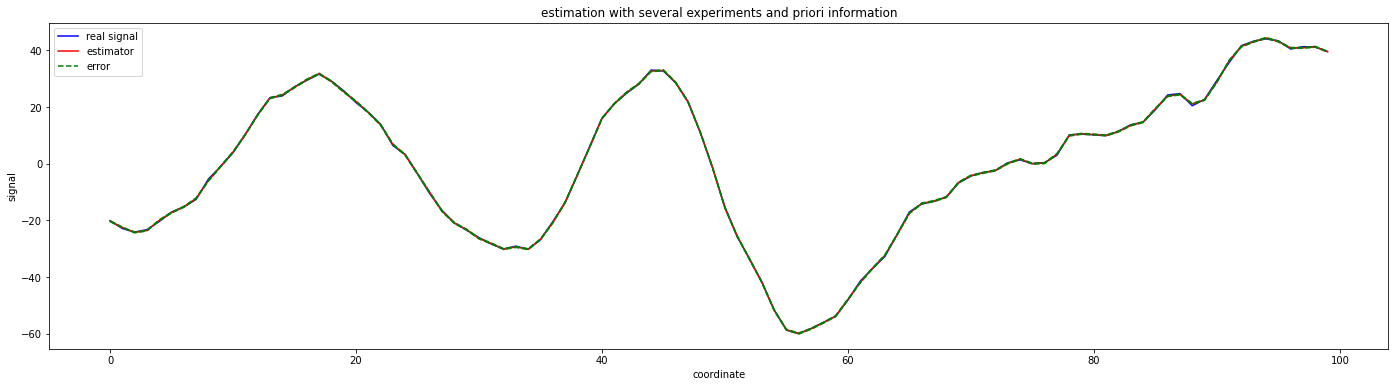

In [158]:
n_exp = 5
T, v = np.zeros((M, M)), np.zeros(M)
for _ in range(n_exp):
    k_0 = np.random.randint(1, 11) #случайный размер окна
    N = M + 2 * k_0 #количество измерений 
    filt = [1 / (2 * k_0 + 1) for _ in range(2 * k_0 + 1)] #прямоугольный фильтр
    a = filt[k_0:] + [0 for _ in range(N - k_0 - 1)] 
    A = toeplitz(a)[:, k_0:-k_0] #матрица A 

    sigma = np.random.rand() * 0.5 #случайный корень дисперсии шума
    S = sigma ** 2 * np.eye(N) #оператор ковариации
    bias = np.random.normal(loc=0, scale=sigma, size=N) #вектор шума

    y = A @ x + bias

    T += np.transpose(A) @ inv(S) @ A + T_0
    v += np.transpose(A) @ inv(S) @ y + v_0



var = inv(T) #оценка ковариационной матрицы
estimator = var @ v #оценка x
D = np.array([np.sqrt(var[i, i]) for i in range(len(var))]) #вектор дисперсий x

plt.figure(figsize=(24, 6))
plt.xlabel('coordinate')
plt.ylabel('signal')
plt.plot(np.arange(M), x, color='blue', label='real signal')
plt.plot(np.arange(M), estimator, color='red', label='estimator')
plt.plot(np.arange(M), estimator - D, color='green', label='error', ls='--')
plt.plot(np.arange(M), estimator + D, color='green', ls='--')
plt.legend()
plt.title('estimation with several experiments and priori information')
plt.show()

errors['estimation with {0} experiments and priori information'.format(n_exp)] = mean_squared_error(x, estimator)

Ошибки для всех методов оценивания

In [159]:
for key, value in errors.items():
    print('mse for ' + key + ' is', value)

mse for basic estimation is 249.97649477423272
mse for estimation after transition to canonical information is 249.9764947742472
mse for estimation with piori information is 3.681850429937919
mse for estimation with 5 experiments is 0.3450634148073085
mse for estimation with 5 experiments and priori information is 0.06243702536048655
